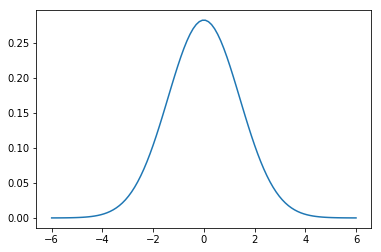

In [1]:
#Normal Distriution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

mu = 0 #mean
variance = 2 #variance
sigma = np.sqrt(variance) # standard deviation
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,norm.pdf(x,mu,sigma))

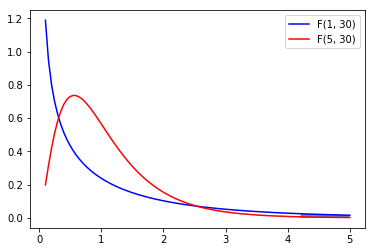

In [2]:
#Fisher's F-Distributions
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
%matplotlib inline

fvalues = np.linspace(.1, 5, 100)

#pdf(x,df1,df2): Probability Density Function at x of F
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()

#cdf(x, df1, df2): Cumulative distribution function of F
proba_at_f_inf_3 = f.cdf(3,1,30)

#ppf(q, df1, df2): Percent Point function(inverse of cdf) at q of F
f_at_proba_inf_95 = f.ppf(.95, 1, 30) # q such P(F(1,30) < 0.95)
assert f.cdf(f_at_proba_inf_95, 1, 30) == .95

#sf(x, df1, df2): Survival Function (1 - cdf) at x of F
proba_at_f_sup3 = f.sf(3, 1, 30) # P(F(1, 30) > 3)
assert proba_at_f_inf_3 + proba_at_f_sup3 == 1

# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30), alpha=.8, label="P < 0.05")
plt.show()

In [1]:
1 + 3

4

2.3968766311585883


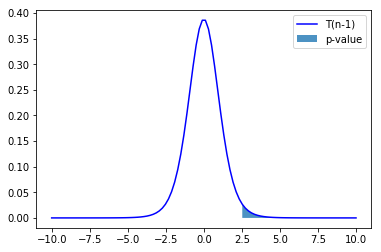

In [4]:
#Hypothesis testing 1 sample t test
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = [1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87]

xbar = np.mean(x) # sample mean
mu0 = 1.75 #hypothesized value
s = np.std(x, ddof=1) # sample standard deviation
n = len(x)

tobs = (xbar - mu0) / (s / np.sqrt(n))
print(tobs)

#tobs = 2.3968766311585883
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1),'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tobs]
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8, label="p-value")
plt.legend()

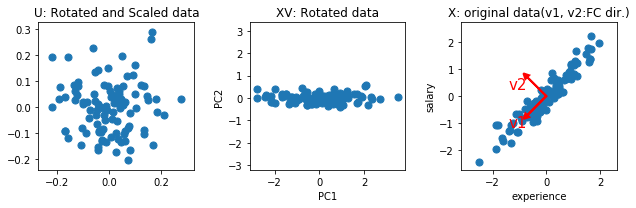

In [7]:
import numpy as np
import scipy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(42)

#dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.3)
X = np.column_stack([experience, salary])

#PCA using SVD
X -= X.mean(axis=0) # for centering
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)

# U : Unitary matrix having left singular vectors as columns.
# Of shape (n_samples,n_samples) or (n_samples,n_comps), depending on
# full_matrices.
#
# s : The singular values, sorted in non-increasing order. Of shape (n_comps,),
# with n_comps = min(n_samples, n_features).
#
# Vh: Unitary matrix having right singular vectors as rows.
# Of shape (n_features, n_features) or (n_comps, n_features) depending
# on full_matrices.

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.scatter(U[:, 0], U[:, 1], s=50)
plt.axis('equal')
plt.title('U: Rotated and Scaled data')

plt.subplot(132)

#Project data
PC = np.dot(X, Vh.T)
plt.scatter(PC[:, 0], PC[:, 1], s=50)
plt.axis('equal')
plt.title("XV: Rotated data")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], s = 50)
for i in range(Vh.shape[0]):
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2, head_length=0.2, linewidth=2, fc='r', ec='r')
    plt.text(Vh[i, 0], Vh[i, 1], 'v%i' % (i+1), color="r", fontsize=15, horizontalalignment='right', verticalalignment='top')

plt.axis('equal')
plt.ylim(-4, 4)
plt.title("X: original data(v1, v2:FC dir.)")
plt.xlabel("experience")
plt.ylabel("salary")

plt.tight_layout()